In [ ]:
import pandas as pd

covid_data = pd.read_csv('/content/all_covid_data.csv')

ParserError: Error tokenizing data. C error: Expected 21 fields in line 1681627, saw 23


In [ ]:
# Liste des pays européens pour filtrer les données
europe = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
    'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]
# Filtrer pour ne garder que les pays d'Europe
europe_data = covid_data[covid_data['Country_Region'].isin(europe)]
# Convertir 'Last_Update' en format datetime
europe_data['Last_Update'] = pd.to_datetime(europe_data['Last_Update'], format='mixed')
# Trier les données par date de mise à jour
europe_data = europe_data.sort_values(by='Last_Update')
# Sélectionner les colonnes utiles
europe_data = europe_data[['Country_Region','Province_State','Last_Update', 'Confirmed', 'Deaths']]
europe_data

<ipython-input-2-34712f5f5e5c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_data['Last_Update'] = pd.to_datetime(europe_data['Last_Update'], format='mixed')


,Country_Region,Province_State,Last_Update,Confirmed,Deaths
30520,Poland,NaN,2020-04-15 22:56:32,7582.0,286.0
30429,Croatia,NaN,2020-04-15 22:56:32,1741.0,33.0
30414,Bulgaria,NaN,2020-04-15 22:56:32,747.0,36.0
30410,Bosnia and Herzegovina,NaN,2020-04-15 22:56:32,1110.0,41.0
30405,Belgium,NaN,2020-04-15 22:56:32,33573.0,4440.0
...,...,...,...,...,...
55299,Russia,Yamalo-Nenets Autonomous Okrug,2023-03-03 04:20:59,153669.0,1060.0
55300,Russia,Yaroslavl Oblast,2023-03-03 04:20:59,192723.0,2891.0
55301,Russia,Zabaykalsky Krai,2023-03-03 04:20:59,192852.0,2378.0
55249,Russia,Kirov Oblast,2023-03-03 04:20:59,166915.0,1101.0


In [ ]:
# Remplacer les valeurs manquantes dans 'Province_State' par 'Statewide' pour signaler l'absence d'information
europe_data['Province_State'] = europe_data['Province_State'].fillna('Statewide')

# Supprimer les doublons en conservant uniquement les dernières occurrences par 'Province_State' et 'Country_Region'
europe_data_last = europe_data.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')

# Appliquer la fonction d'agrégation personnalisée par groupe de pays ('Country_Region')
europe_data_summary = europe_data_last.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

# ISO 3166-1 alpha-3 : permet de faire en sorte de pouvoir exploiter plotly
iso_alpha3_mapping = {
    "Albania": "ALB",
    "Andorra": "AND",
    "Armenia": "ARM",
    "Austria": "AUT",
    "Azerbaijan": "AZE",
    "Belarus": "BLR",
    "Belgium": "BEL",
    "Bosnia and Herzegovina": "BIH",
    "Bulgaria": "BGR",
    "Croatia": "HRV",
    "Cyprus": "CYP",
    "Denmark": "DNK",
    "Estonia": "EST",
    "Finland": "FIN",
    "France": "FRA",
    "Georgia": "GEO",
    "Germany": "DEU",
    "Greece": "GRC",
    "Hungary": "HUN",
    "Iceland": "ISL",
    "Ireland": "IRL",
    "Italy": "ITA",
    "Kazakhstan": "KAZ",
    "Kosovo": "XKX",
    "Latvia": "LVA",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Malta": "MLT",
    "Moldova": "MDA",
    "Monaco": "MCO",
    "Montenegro": "MNE",
    "Netherlands": "NLD",
    "North Macedonia": "MKD",
    "Norway": "NOR",
    "Poland": "POL",
    "Portugal": "PRT",
    "Romania": "ROU",
    "Russia": "RUS",
    "San Marino": "SMR",
    "Serbia": "SRB",
    "Slovakia": "SVK",
    "Slovenia": "SVN",
    "Spain": "ESP",
    "Sweden": "SWE",
    "Switzerland": "CHE",
    "Turkey": "TUR",
    "Ukraine": "UKR",
    "United Kingdom": "GBR"
}

# Ajouter une colonne ISO alpha-3
europe_data_summary["ISO_alpha-3"] = europe_data_summary["Country_Region"].map(iso_alpha3_mapping)

# Ajout des populations estimées en mars 2023, données de wikipedia
population_data = {
    "Albania": 2.8e6, "Andorra": 79_000, "Armenia": 2.8e6, "Austria": 9e6, "Azerbaijan": 10.2e6,
    "Belarus": 9.3e6, "Belgium": 11.7e6, "Bosnia and Herzegovina": 3.2e6, "Bulgaria": 6.8e6,
    "Croatia": 3.9e6, "Cyprus": 1.2e6, "Denmark": 5.9e6, "Estonia": 1.3e6, "Finland": 5.5e6,
    "France": 68e6, "Georgia": 3.7e6, "Germany": 84e6, "Greece": 10.4e6, "Hungary": 9.6e6,
    "Iceland": 390_000, "Ireland": 5.1e6, "Italy": 59e6, "Kazakhstan": 19.6e6, "Kosovo": 1.8e6,
    "Latvia": 1.8e6, "Liechtenstein": 39_000, "Lithuania": 2.8e6, "Luxembourg": 645_000,
    "Malta": 500_000, "Moldova": 2.6e6, "Monaco": 39_000, "Montenegro": 620_000,
    "Netherlands": 17.5e6, "North Macedonia": 2.1e6, "Norway": 5.4e6, "Poland": 38e6,
    "Portugal": 10.3e6, "Romania": 19e6, "Russia": 143e6, "San Marino": 34_000,
    "Serbia": 6.8e6, "Slovakia": 5.4e6, "Slovenia": 2.1e6, "Spain": 47e6, "Sweden": 10.5e6,
    "Switzerland": 8.8e6, "Turkey": 85e6, "Ukraine": 37e6, "United Kingdom": 67e6
}

europe_data_summary["Population"] = europe_data_summary["Country_Region"].map(population_data)

# Ajout d'une colonne pour le ratio de cas par population
europe_data_summary['Cases_Per_Population'] = europe_data_summary['Confirmed'] / europe_data_summary['Population']

# Afficher le résultat final résumant les cas confirmés et les décès par pays
europe_data_summary

,Country_Region,Confirmed,Deaths,ISO_alpha-3,Population,Cases_Per_Population
0,Albania,334427.0,3598.0,ALB,2800000.0,0.119438
1,Andorra,47875.0,165.0,AND,79000.0,0.606013
2,Armenia,446819.0,8721.0,ARM,2800000.0,0.159578
3,Austria,5949418.0,21941.0,AUT,9000000.0,0.661046
4,Azerbaijan,828783.0,10135.0,AZE,10200000.0,0.081253
5,Belarus,994037.0,7118.0,BLR,9300000.0,0.106886
6,Belgium,5228584.0,46830.0,BEL,11700000.0,0.446888
7,Bosnia and Herzegovina,401636.0,16279.0,BIH,3200000.0,0.125511
8,Bulgaria,1297358.0,38222.0,BGR,6800000.0,0.190788
9,Croatia,1269326.0,17987.0,HRV,3900000.0,0.325468


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = europe_data_summary['ISO_alpha-3'],
    z = europe_data_summary['Cases_Per_Population'],
    colorscale = 'Reds',
    colorbar_title = 'Cases_Per_Population',
))

fig.show()

In [ ]:
#On a pu avoir les valeurs qui nous interesse pour les plus recente 2023-03-10 mais pour faire un histoirique il nous faut les l'historique des valeur
# Avant 2023
europe_data_before_2023 = europe_data[europe_data['Last_Update'] < '2023-01-01']
europe_data_last_before_2023 = europe_data_before_2023.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2023 = europe_data_last_before_2023.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

europe_data_before_2022_07 = europe_data[europe_data['Last_Update'] < '2022-07-01']
europe_data_last_before_2022_07 = europe_data_before_2022_07.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2022_07 = europe_data_last_before_2022_07.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

# Avant 2022
europe_data_before_2022 = europe_data[europe_data['Last_Update'] < '2022-01-01']
europe_data_last_before_2022 = europe_data_before_2022.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2022 = europe_data_last_before_2022.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

europe_data_before_2021_07 = europe_data[europe_data['Last_Update'] < '2021-07-01']
europe_data_last_before_2021_07 = europe_data_before_2021_07.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2021_07 = europe_data_last_before_2021_07.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

# Avant 2021
europe_data_before_2021 = europe_data[europe_data['Last_Update'] < '2021-01-01']
europe_data_last_before_2021 = europe_data_before_2021.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2021 = europe_data_last_before_2021.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

europe_data_before_2020_07 = europe_data[europe_data['Last_Update'] < '2020-07-01']
europe_data_last_before_2020_07 = europe_data_before_2020_07.drop_duplicates(subset=['Province_State', 'Country_Region'], keep='last')
europe_data_summary_before_2020_07 = europe_data_last_before_2020_07.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()

# Début 2020-03-22
europe_data_first = europe_data.drop_duplicates(subset=['Province_State', 'Country_Region',], keep='first')
europe_data_first_summary = europe_data_first.groupby('Country_Region').agg({'Confirmed': 'sum','Deaths': 'sum'}).reset_index()
europe_data_first_summary['Deaths'].sum()

115058.0

In [ ]:
# Liste des dates fournies
dates = [
    "2020-03-26", "2020-07-01", "2021-01-01", "2021-07-01",
    "2022-01-01", "2022-07-01", "2023-01-01", "2023-03-08"
]

# Dictionnaires pour les valeurs spécifiques par date
data_dict = {
    "2020-03-26": (europe_data_first_summary['Deaths'].sum(), europe_data_first_summary['Confirmed'].sum()),
    "2020-07-01": (europe_data_summary_before_2020_07['Deaths'].sum(), europe_data_summary_before_2020_07['Confirmed'].sum()),
    "2021-01-01": (europe_data_summary_before_2021['Deaths'].sum(), europe_data_summary_before_2021['Confirmed'].sum()),
    "2021-07-01": (europe_data_summary_before_2021_07['Deaths'].sum(), europe_data_summary_before_2021_07['Confirmed'].sum()),
    "2022-01-01": (europe_data_summary_before_2022['Deaths'].sum(), europe_data_summary_before_2022['Confirmed'].sum()),
    "2022-07-01": (europe_data_summary_before_2022_07['Deaths'].sum(), europe_data_summary_before_2022_07['Confirmed'].sum()),
    "2023-01-01": (europe_data_summary_before_2023['Deaths'].sum(), europe_data_summary_before_2023['Confirmed'].sum()),
    "2023-03-08": (europe_data_summary['Deaths'].sum(), europe_data_summary['Confirmed'].sum())
}

# Création du DataFrame avec les valeurs mises à jour
data = pd.DataFrame({
    'Date': pd.to_datetime(dates),
})

# Mise à jour des colonnes avec les valeurs correspondantes
data[['Deaths', 'Confirmed']] = data['Date'].dt.strftime('%Y-%m-%d').map(data_dict).apply(pd.Series)

data


,Date,Deaths,Confirmed
0,2020-03-26,115058.0,1978018.0
1,2020-07-01,278444.0,3723532.0
2,2021-01-01,434927.0,15510287.0
3,2021-07-01,1261175.0,55191814.0
4,2022-01-01,1541788.0,78315590.0
5,2022-07-01,2081970.0,221116995.0
6,2023-01-01,2173269.0,256357918.0
7,2023-03-08,2240571.0,267390330.0


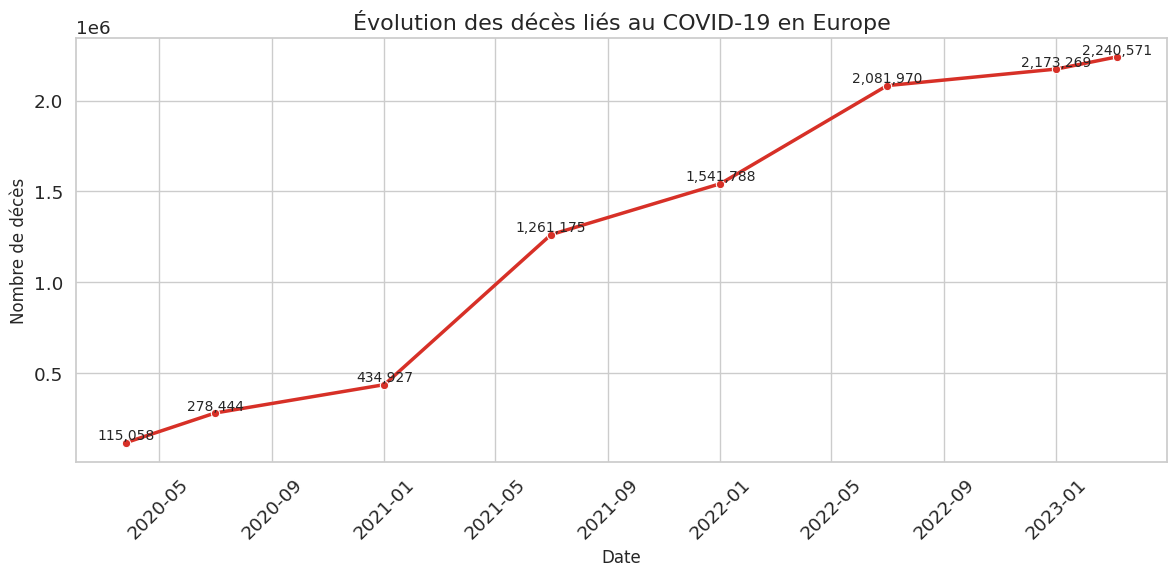

In [ ]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de Seaborn pour un style élégant
sns.set(style="whitegrid", palette="dark", font_scale=1.2)

# Conversion de la colonne "Date" en format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Création du graphique
plt.figure(figsize=(12, 6))  # Taille du graphique
sns.lineplot(x="Date", y="Deaths", data=data, marker="o", linewidth=2.5, color="#d73027")

# Ajout des titres et labels
plt.title("Évolution des décès liés au COVID-19 en Europe", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de décès", fontsize=12)

# Mise en valeur des points avec les valeurs des décès
for x, y in zip(data['Date'], data['Deaths']):
    plt.text(x, y, f"{y:,}", ha="center", va="bottom", fontsize=10)

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique
plt.tight_layout()
plt.show()